# Heart Failure Prediction

- **Age**: Age of the patient (years).  
- **Sex**: Sex of the patient (M: Male, F: Female).  
- **ChestPainType**: Chest pain type  
  - TA: Typical Angina  
  - ATA: Atypical Angina  
  - NAP: Non-Anginal Pain  
  - ASY: Asymptomatic  
- **RestingBP**: Resting blood pressure (mm Hg).  
- **Cholesterol**: Serum cholesterol (mg/dl).  
- **FastingBS**: Fasting blood sugar  
  - 1: FastingBS > 120 mg/dl  
  - 0: otherwise  
- **RestingECG**: Resting electrocardiogram results  
  - Normal  
  - ST: ST-T wave abnormality  
  - LVH: Left ventricular hypertrophy by Estes' criteria  
- **MaxHR**: Maximum heart rate achieved (60–202).  
- **ExerciseAngina**: Exercise-induced angina (Y/N).  
- **Oldpeak**: ST depression value.  
- **ST_Slope**: Slope of peak exercise ST segment  
  - Up  
  - Flat  
  - Down  
- **HeartDisease**: Output label  
  - 1: Heart disease  
  - 0: Normal

## Dataset Information

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [199]:
data = pd.read_csv('../data/heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N     0.00       Up             0
1   49   F           NAP        160          180          0     Normal    156              N     1.00     Flat             1
2   37   M           ATA        130          283          0         ST     98              N     0.00       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y     1.50     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N     0.00       Up             0

In [200]:
data.shape

(918, 12)

In [201]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'], dtype='object')

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [203]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [204]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

In [205]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

## Exploratory Data Analysis

### Label encoding

In [206]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [207]:
from sklearn.preprocessing import LabelEncoder
df1 = data.copy(deep = True)

le_sex = LabelEncoder()
le_chest = LabelEncoder()
le_ecg = LabelEncoder()
le_angina = LabelEncoder()
le_slope = LabelEncoder()

# Fit và transform từng cột
le_sex.fit(df1['Sex'])
df1['Sex'] = le_sex.transform(df1['Sex'])

le_chest.fit(df1['ChestPainType'])
df1['ChestPainType'] = le_chest.transform(df1['ChestPainType'])

le_ecg.fit(df1['RestingECG'])
df1['RestingECG'] = le_ecg.transform(df1['RestingECG'])

le_angina.fit(df1['ExerciseAngina'])
df1['ExerciseAngina'] = le_angina.transform(df1['ExerciseAngina'])

le_slope.fit(df1['ST_Slope'])
df1['ST_Slope'] = le_slope.transform(df1['ST_Slope'])

### Data visualization

In [208]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]], kde_kws = {'bw' : 1}, color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]], kde_kws = {'bw' : 1}, color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

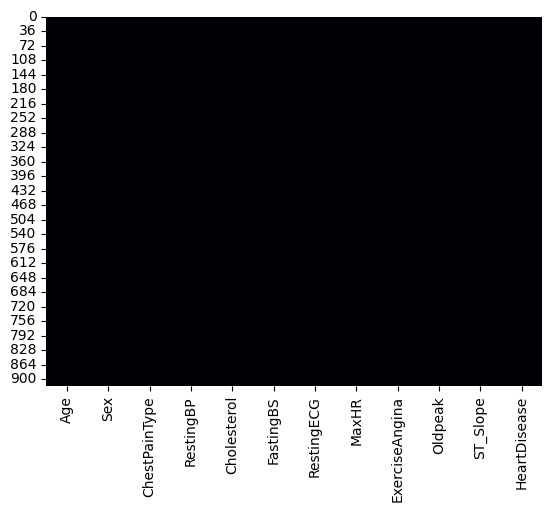

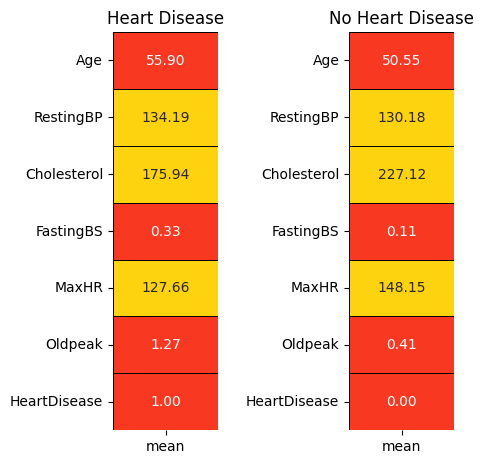

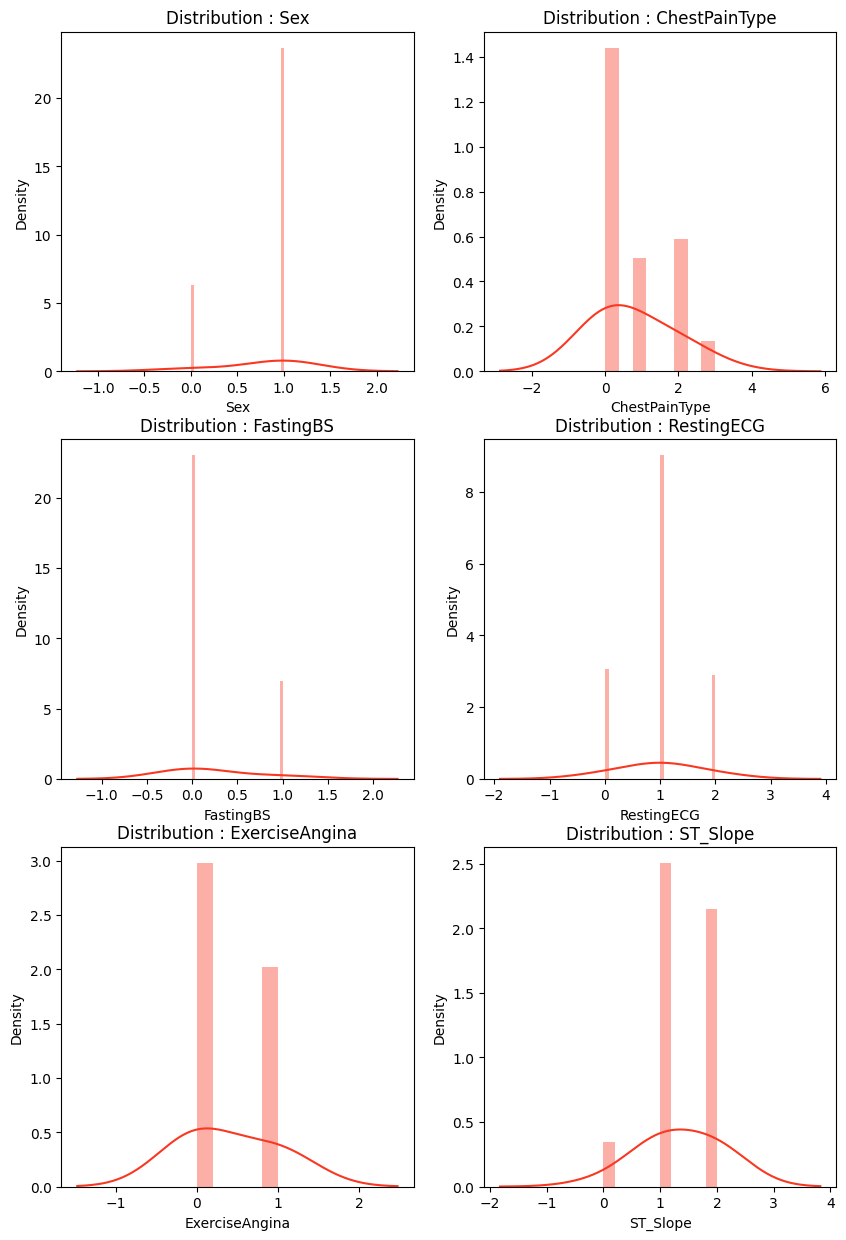

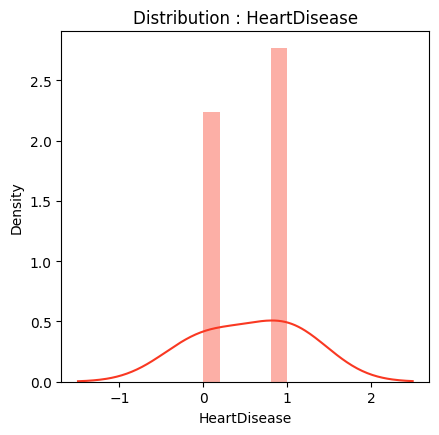

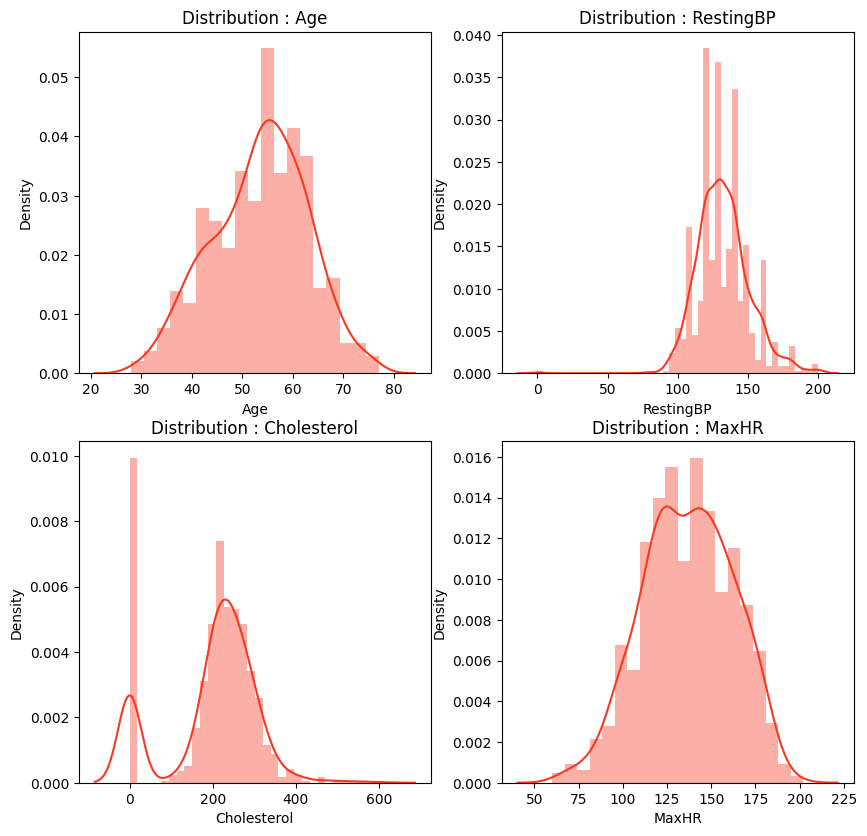

In [209]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

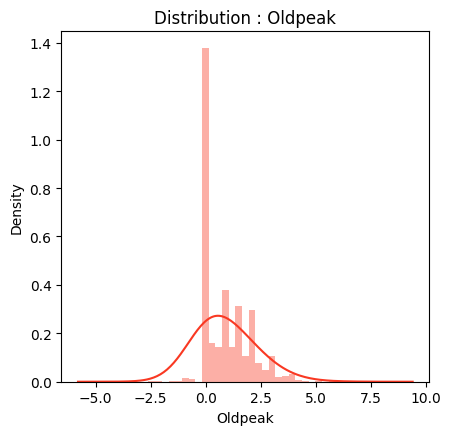

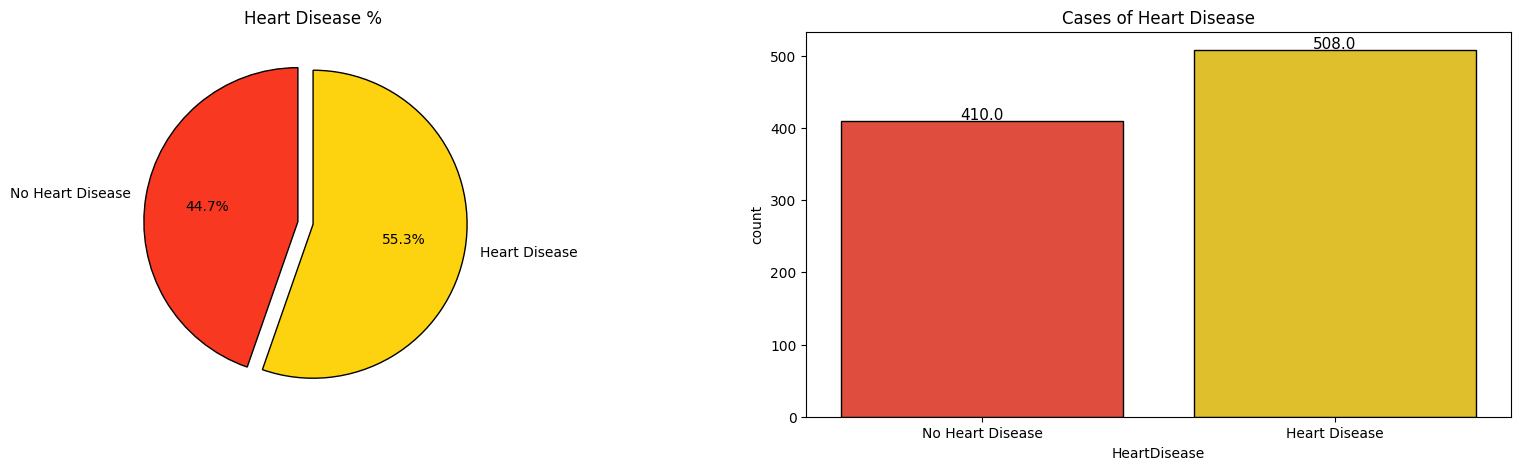

In [210]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

In [211]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x = categorical_features[i],data = data,hue = "HeartDisease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [212]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

In [213]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

In [214]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [215]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

In [216]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x = group_numerical_features[i],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

In [217]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

In [218]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

In [219]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

In [220]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

In [221]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

In [222]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

In [223]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

## Feature Engineering

### Data Normalization and Standardization

In [224]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# MinMax cho 'Oldpeak'
mms = MinMaxScaler()
mms.fit(df1[['Oldpeak']])
df1['Oldpeak'] = mms.transform(df1[['Oldpeak']])

# StandardScaler cho các cột còn lại
std_cols = ['Age','RestingBP','Cholesterol','MaxHR']
ss = StandardScaler()
ss.fit(df1[std_cols])
df1[std_cols] = ss.transform(df1[std_cols])

df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
0 -1.43    1              1       0.41         0.83          0           1   1.38               0     0.30         2             0
1 -0.48    0              2       1.49        -0.17          0           1   0.75               0     0.41         1             1
2 -1.75    1              1      -0.13         0.77          0           2  -1.53               0     0.30         2             0
3 -0.58    0              0       0.30         0.14          0           1  -1.13               1     0.47         1             1
4  0.05    1              2       0.95        -0.03          0           1  -0.58               0     0.30         2             0

### Feature Correlation Analysis

In [225]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

In [226]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

### Categorical Feature Importance (Chi² Test)

In [227]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [228]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Numerical Feature Importance (ANOVA F-Test)

In [229]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

## Modeling

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [231]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
target = df1['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [232]:
def model(classifier):
    classifier.fit(x_train.values,y_train.values)
    prediction = classifier.predict(x_test.values)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print('Accuracy : ','{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train.values,y_train.values,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test.values,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test.values))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test.values)))

### Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy :  87.50%
Cross Validation Score :  91.11%
ROC_AUC Score :  87.43%


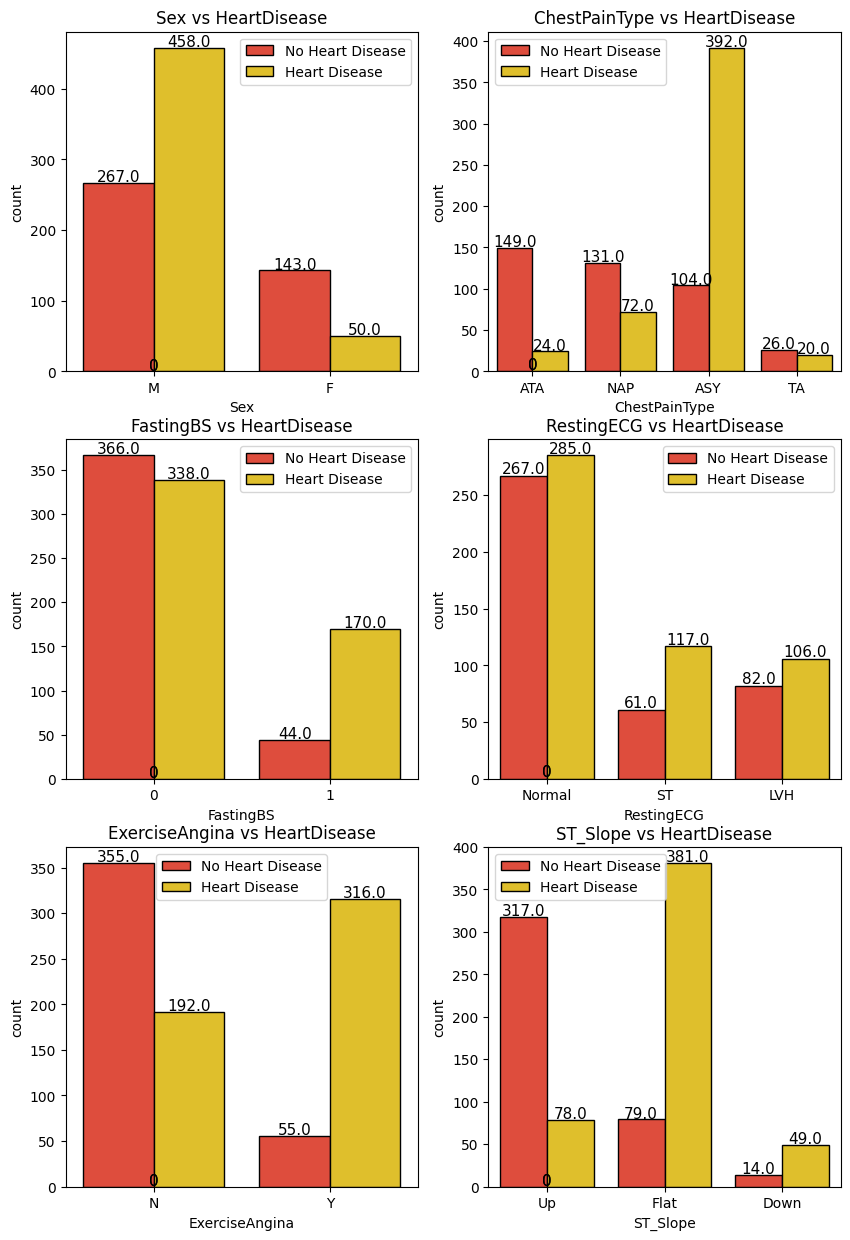

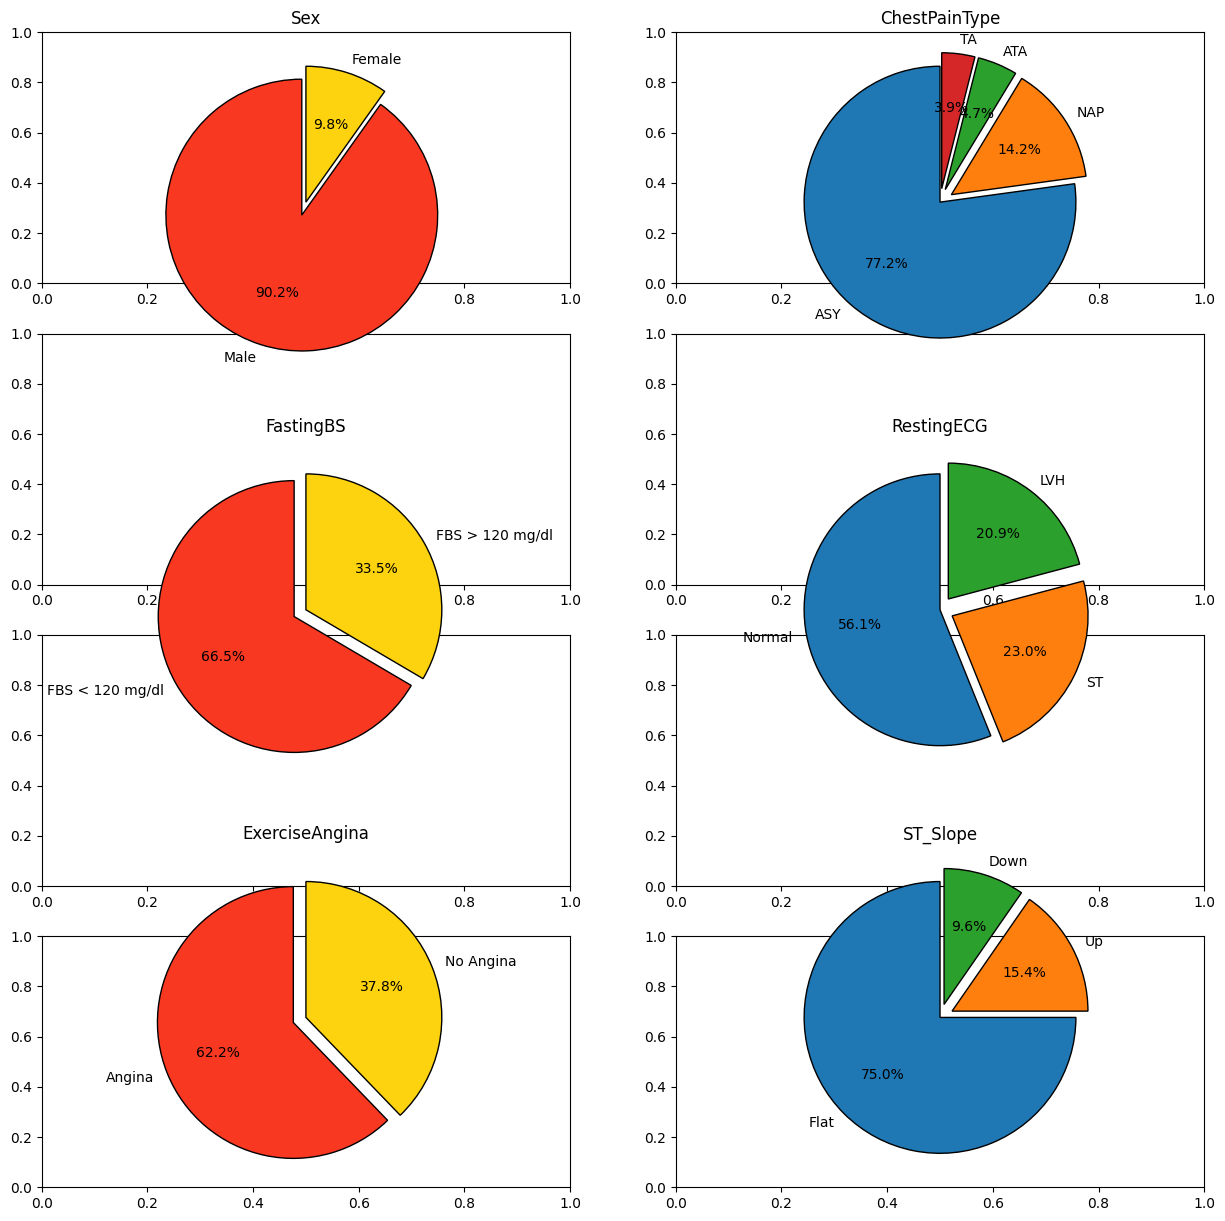

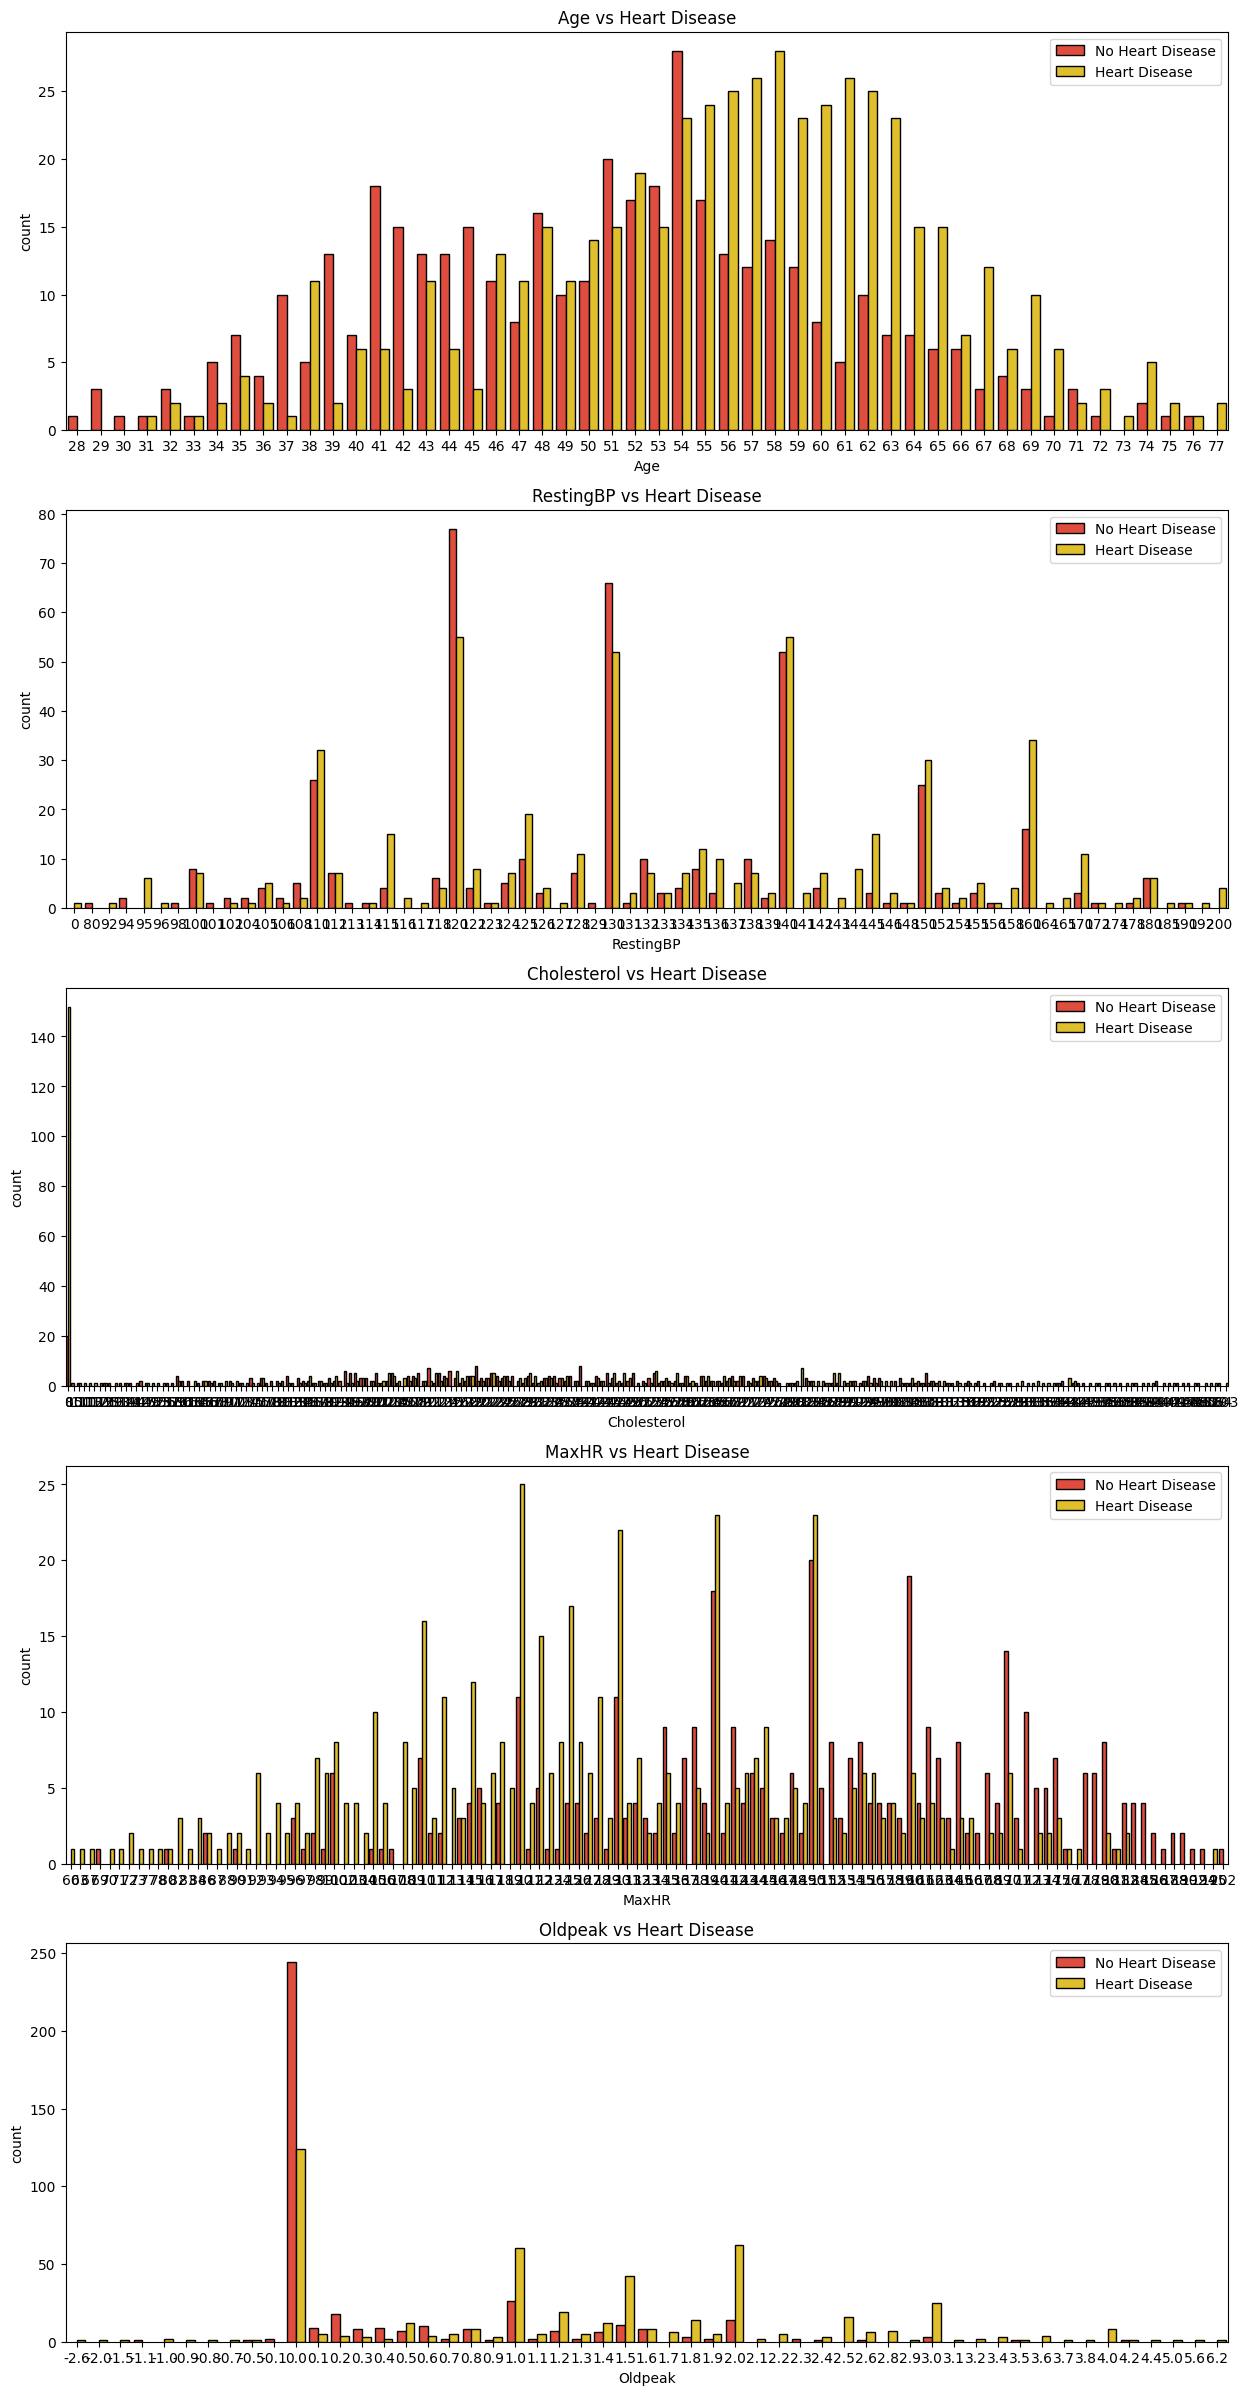

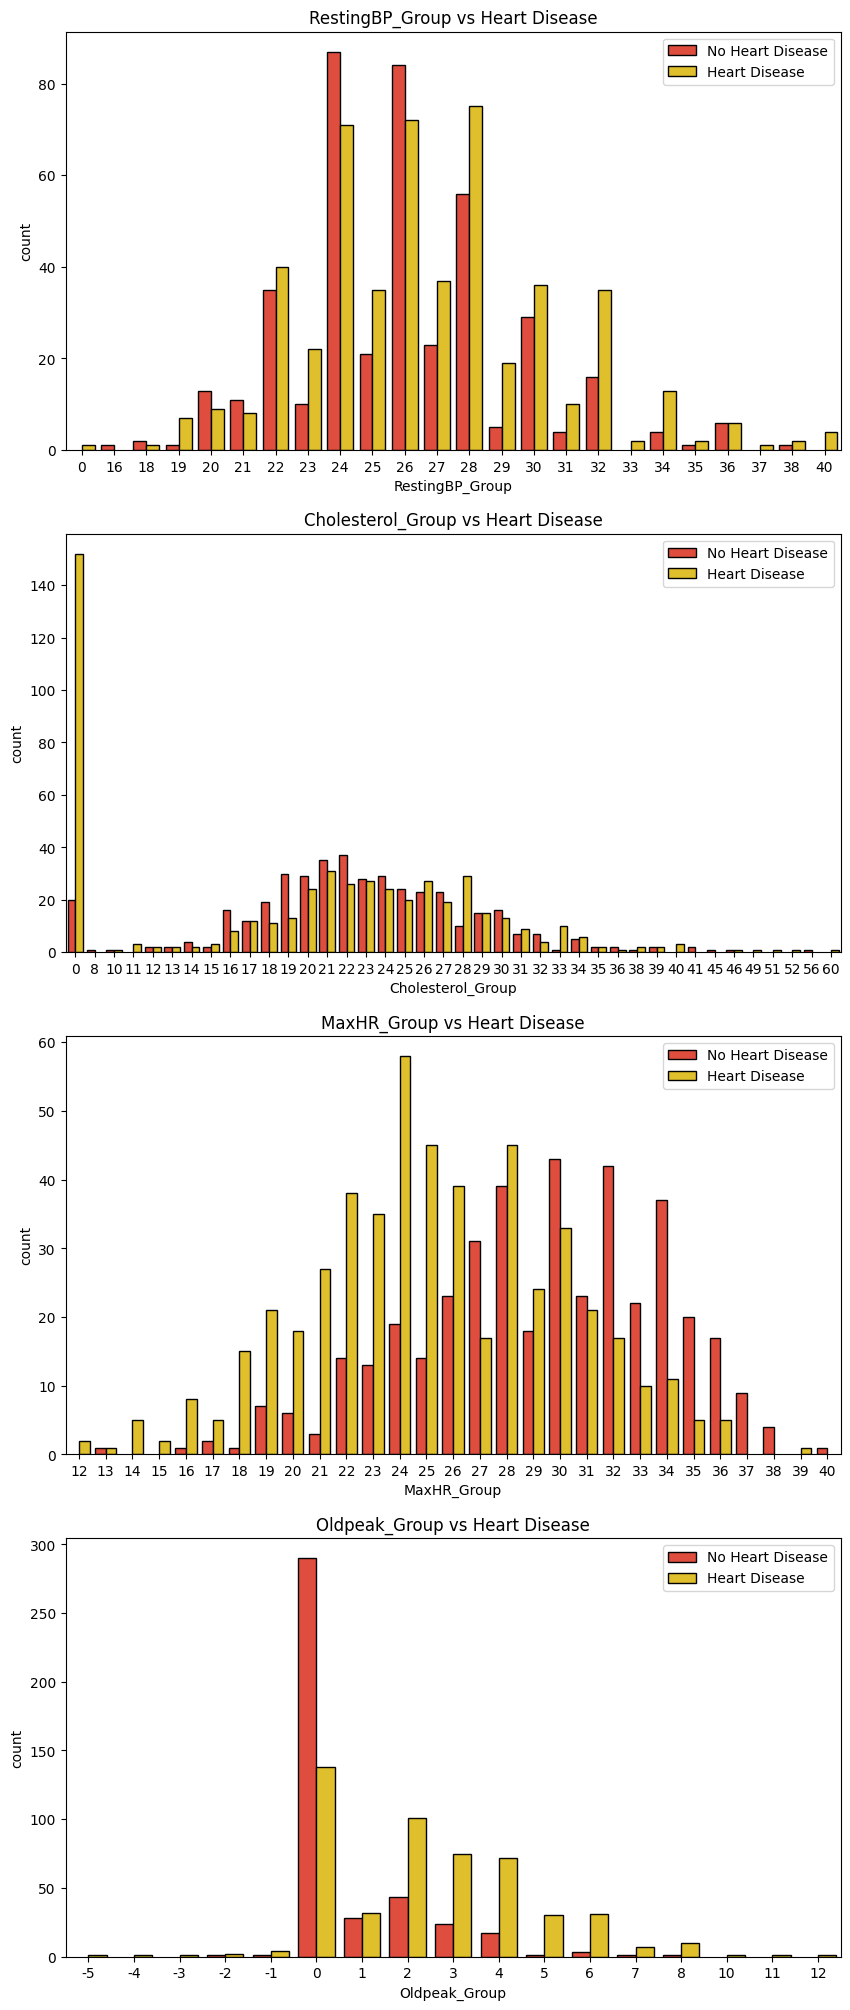

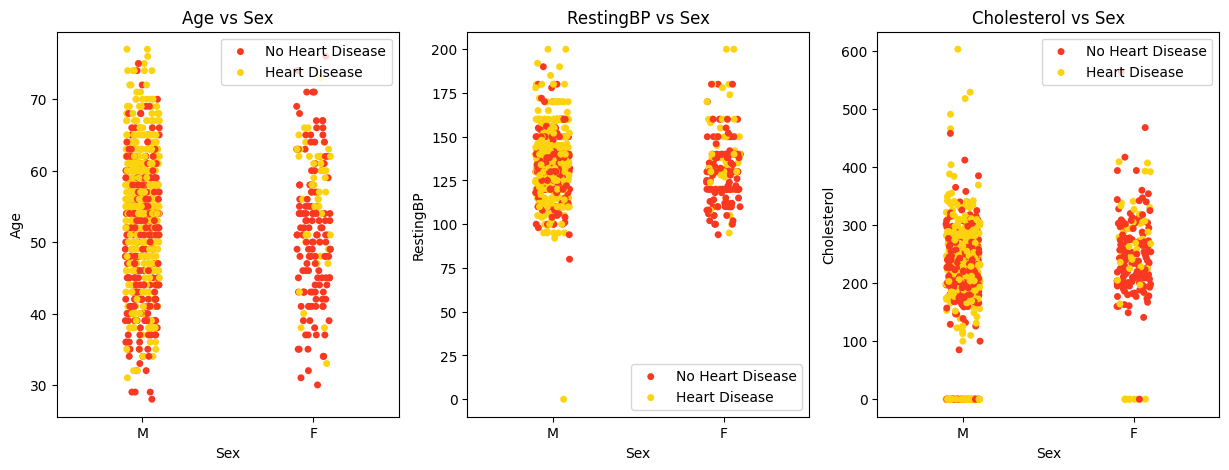

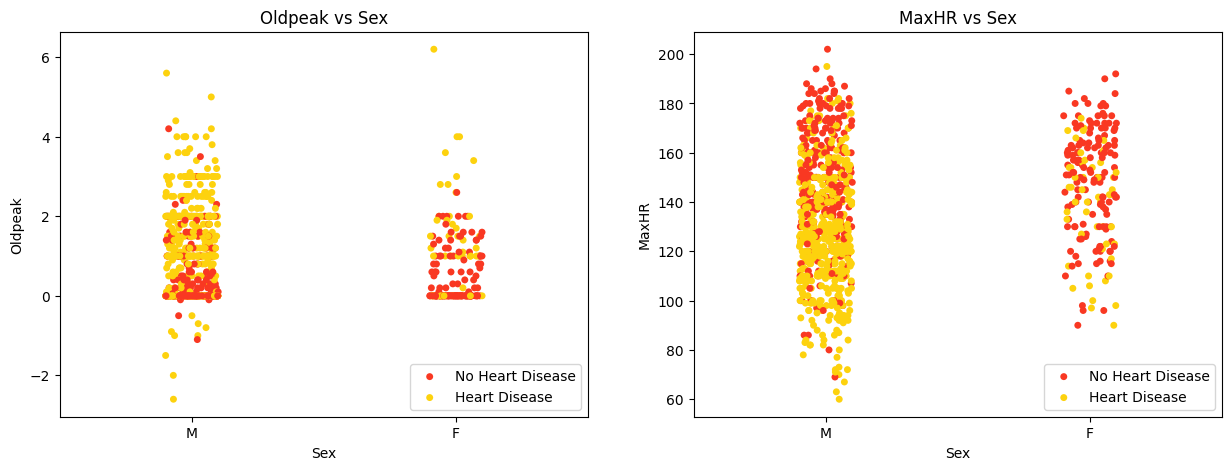

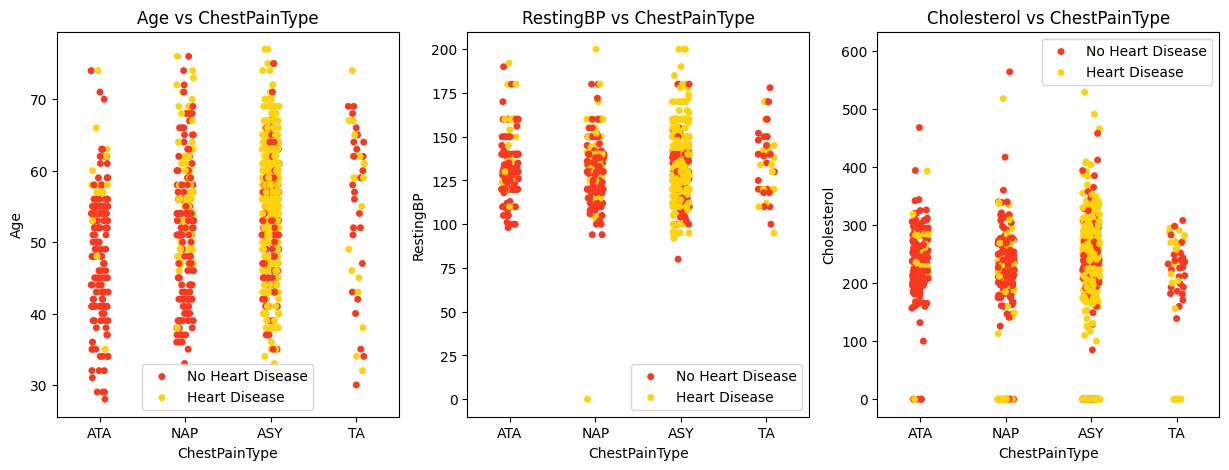

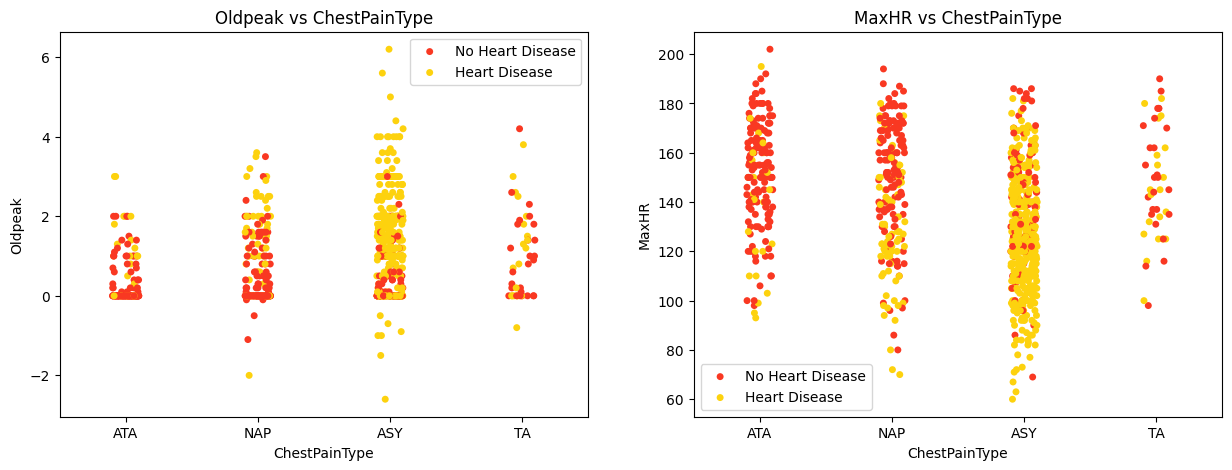

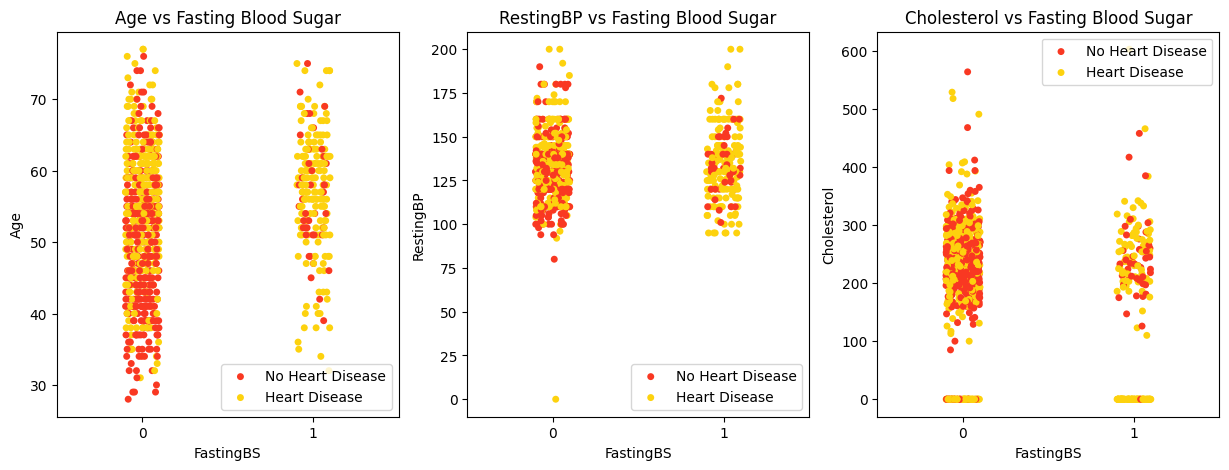

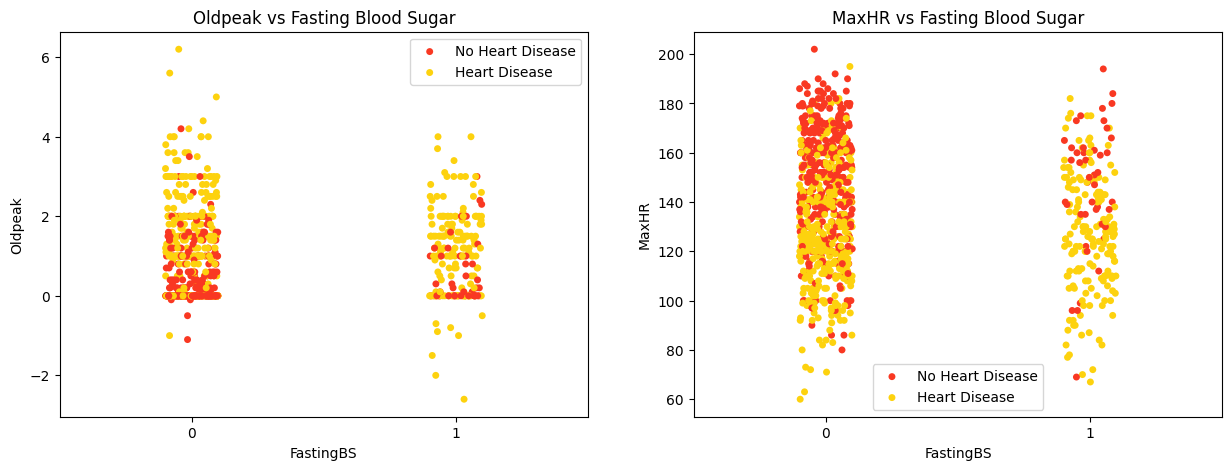

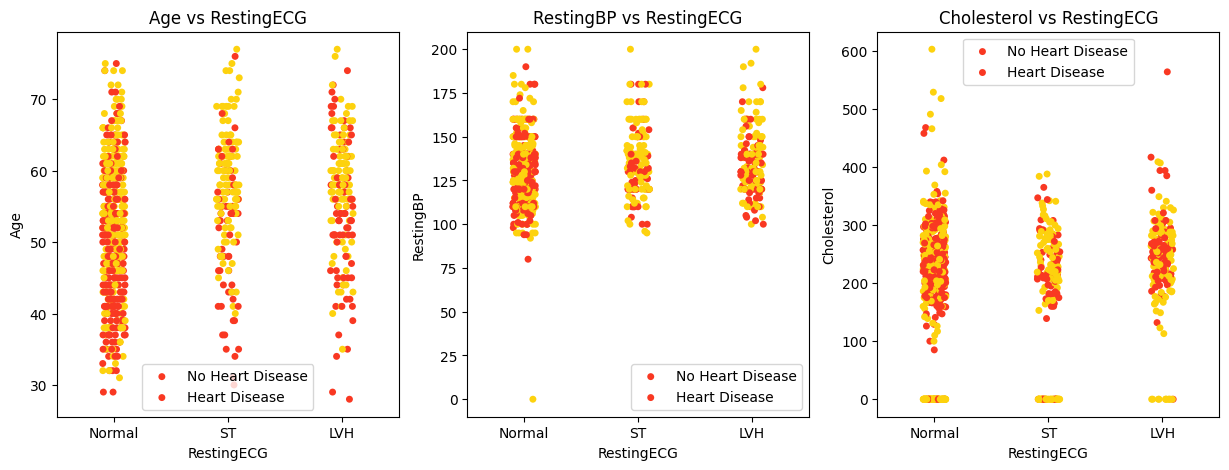

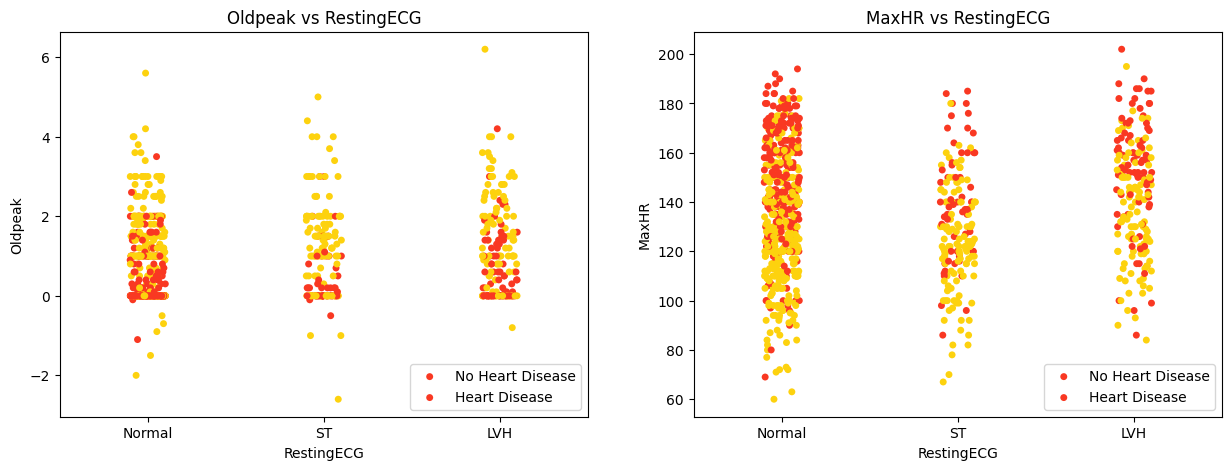

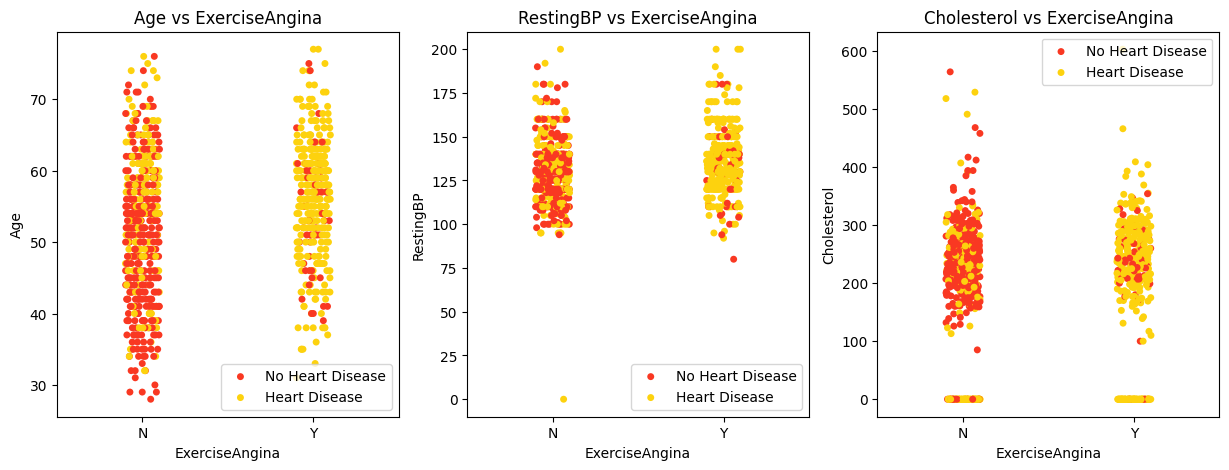

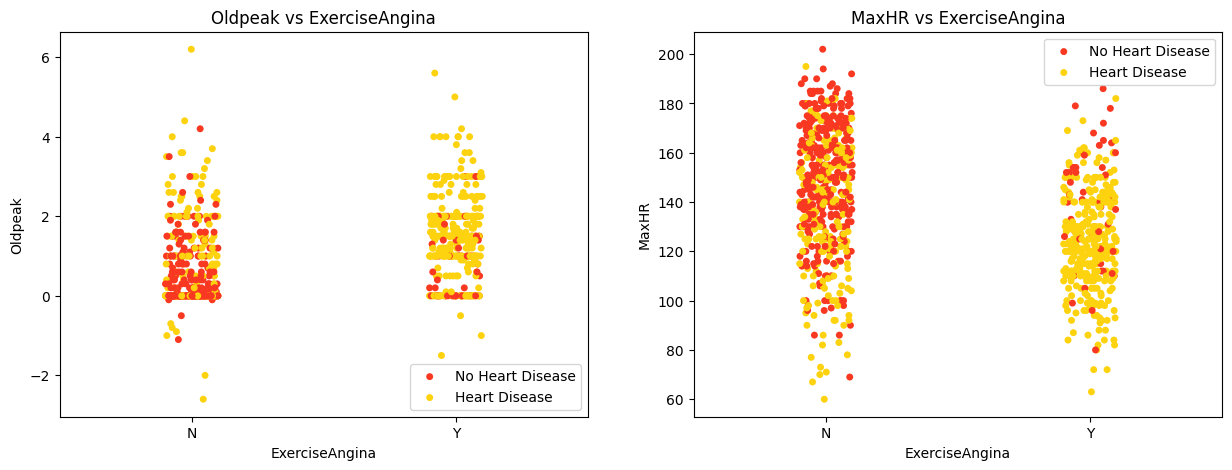

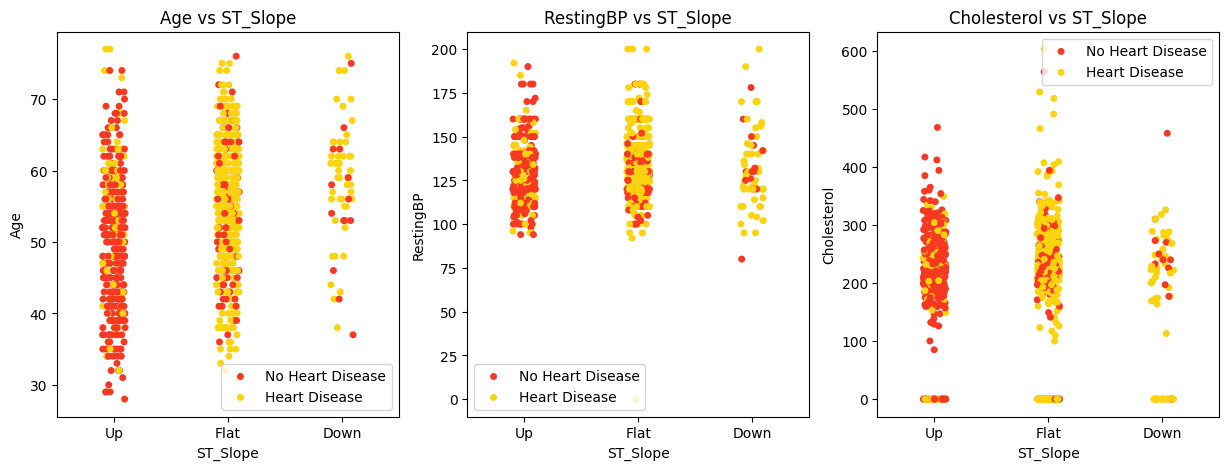

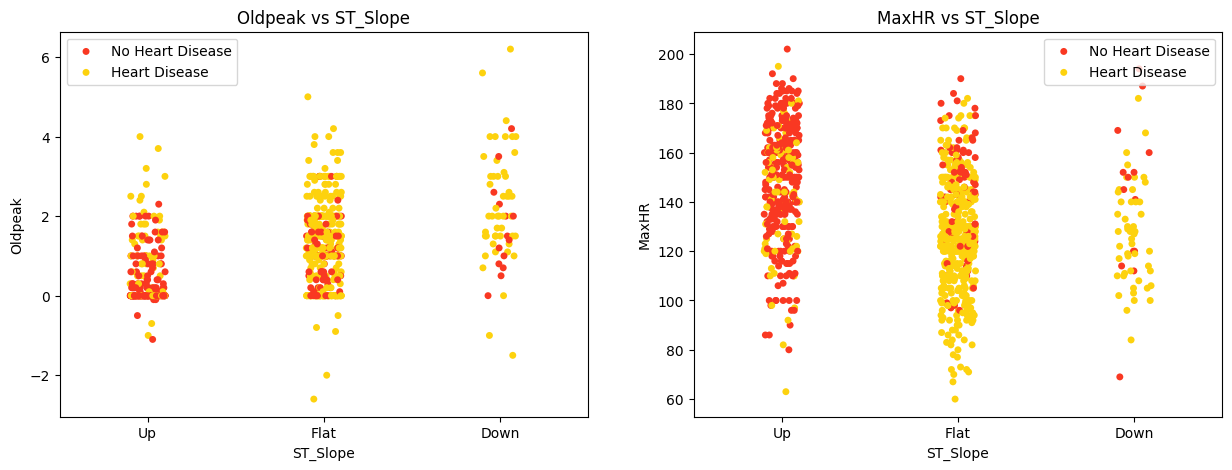

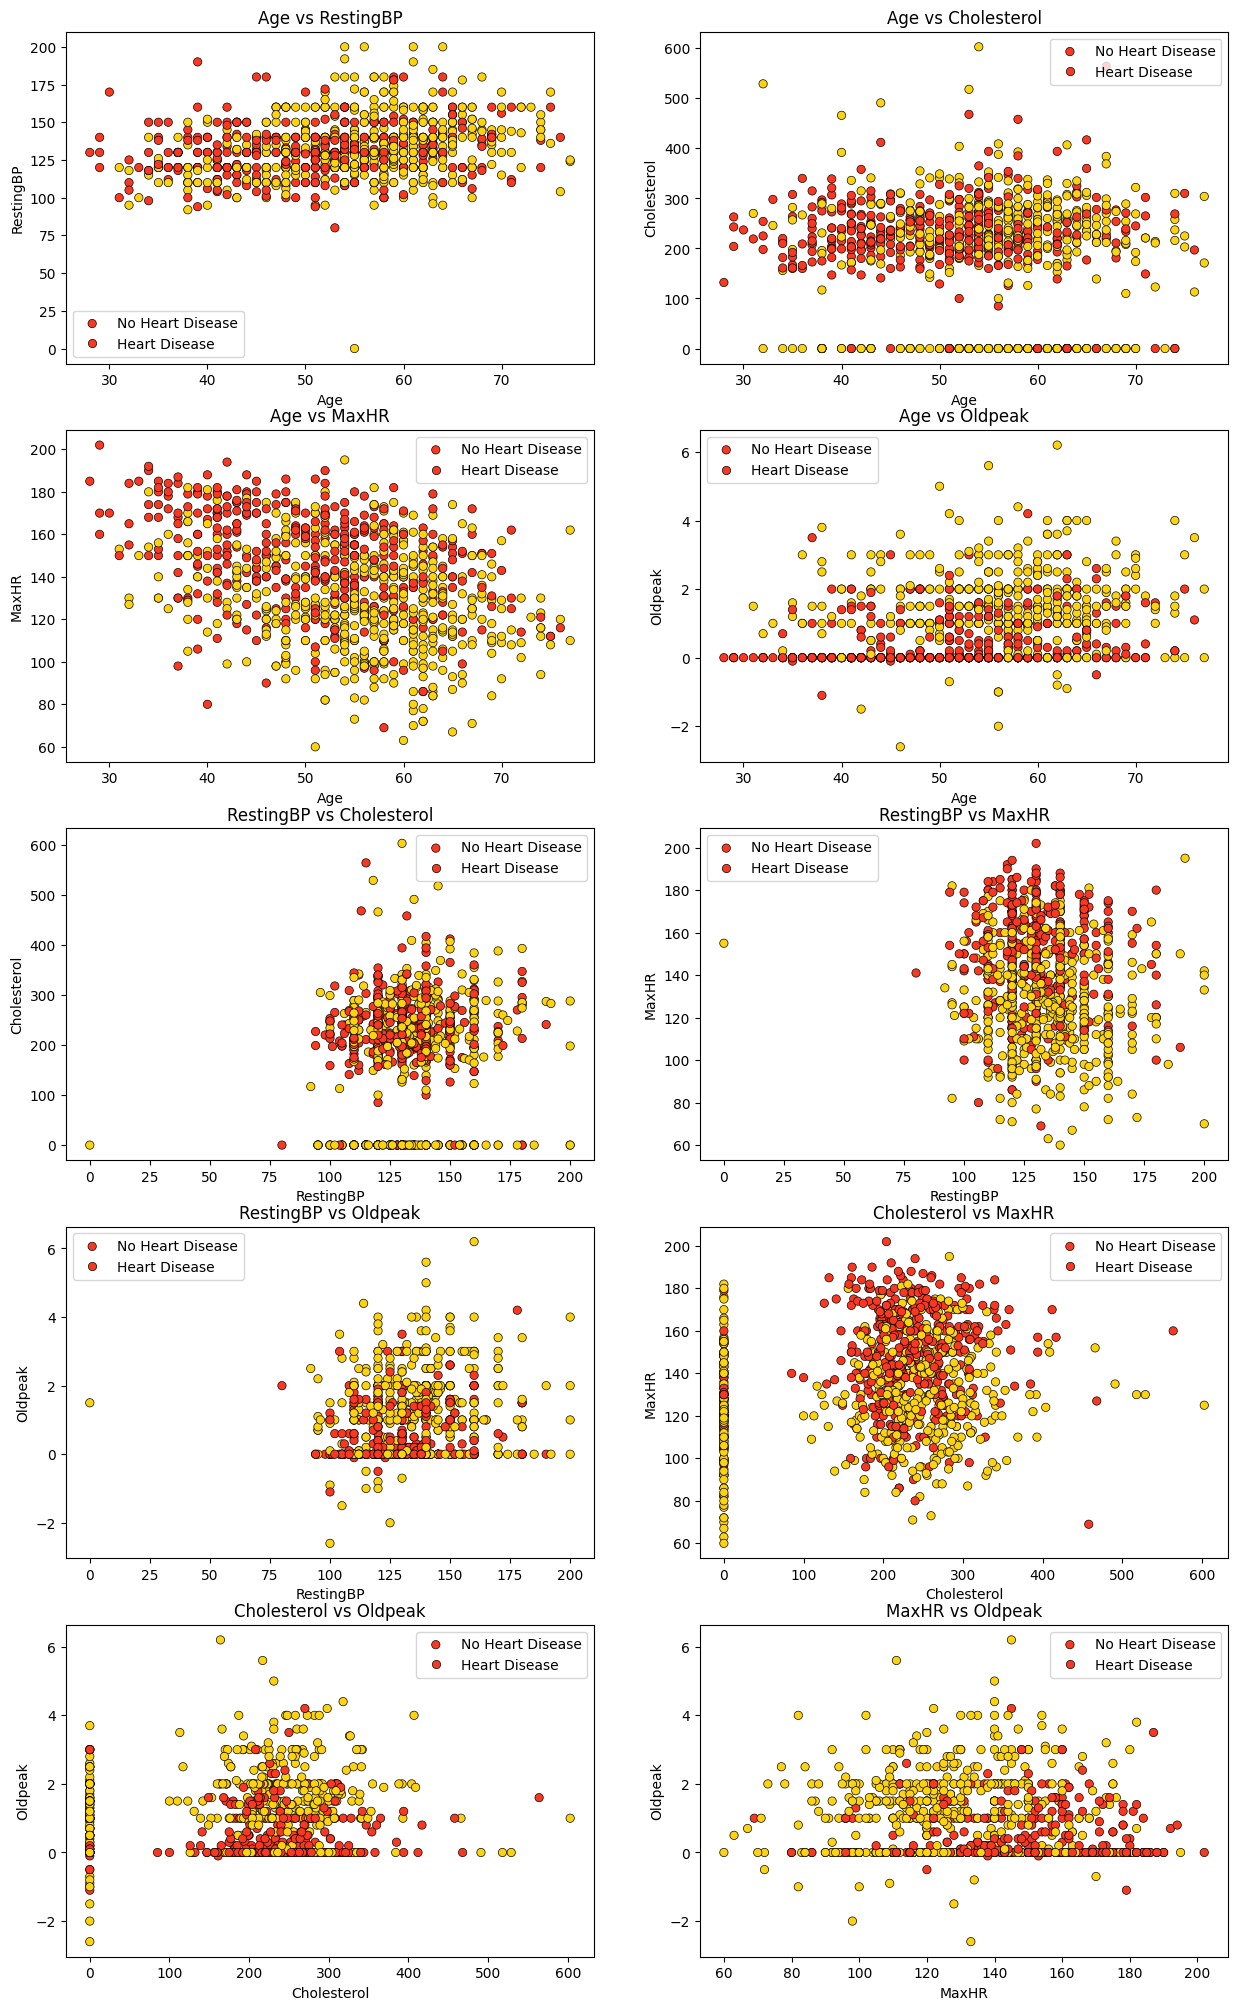

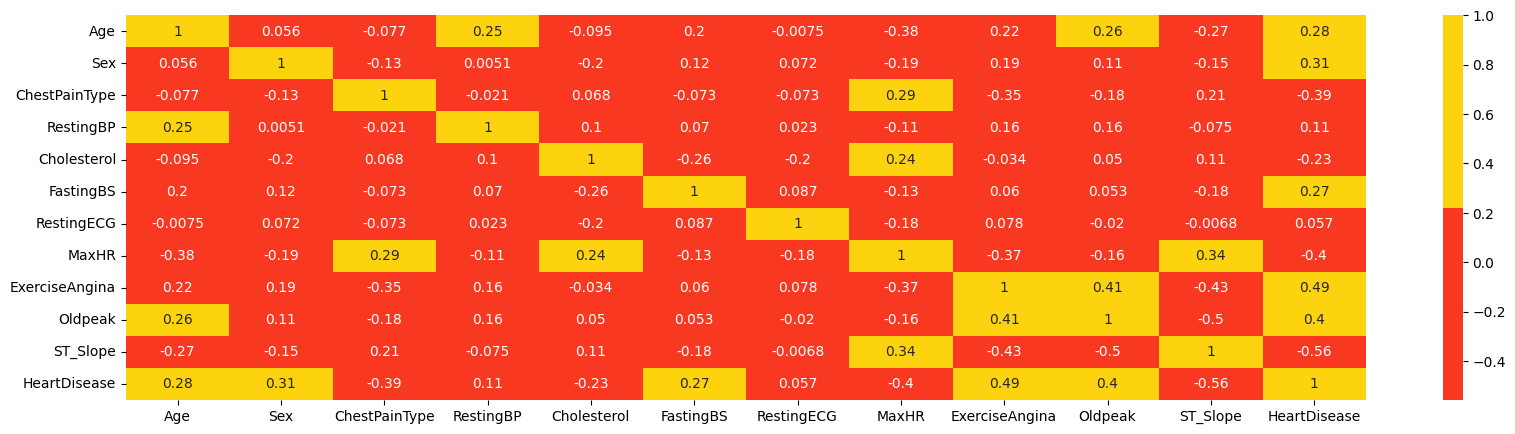

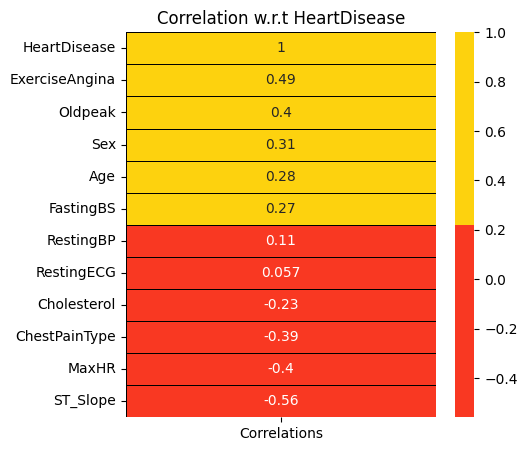

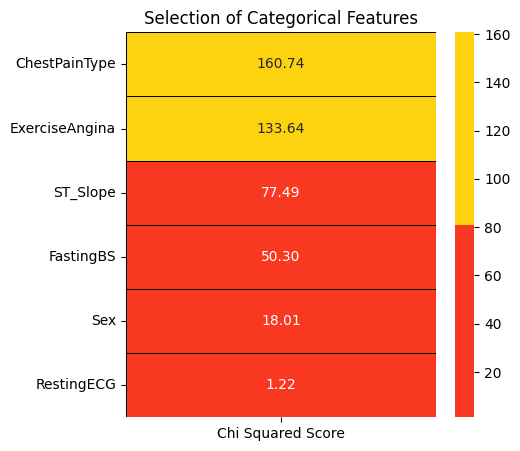

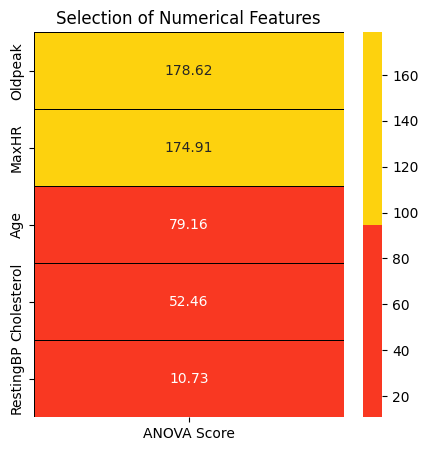

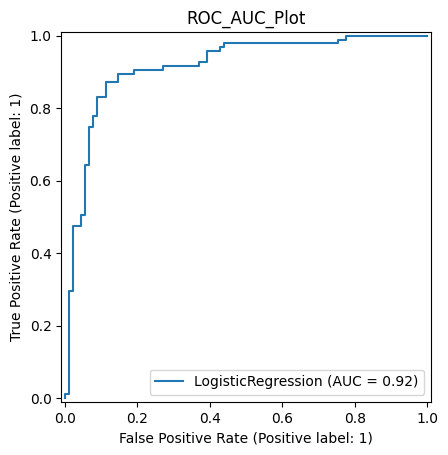

In [235]:
model(classifier_lr)

In [236]:
model_evaluation(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



### Support Vector Classifier

In [237]:
from sklearn.svm import SVC

In [238]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


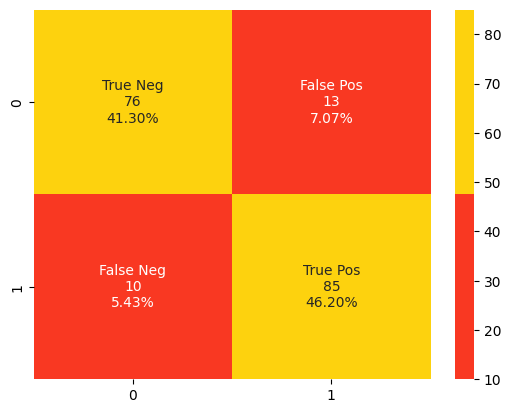

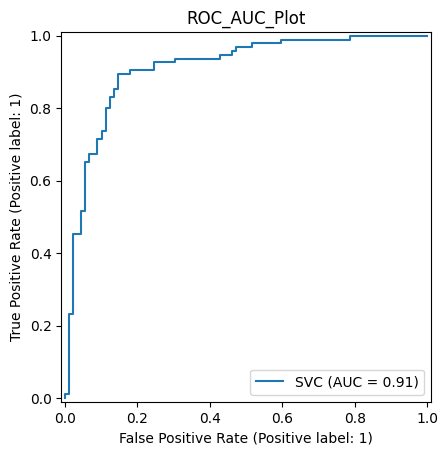

In [239]:
model(classifier_svc)

In [240]:
model_evaluation(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



### Decision Tree Classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


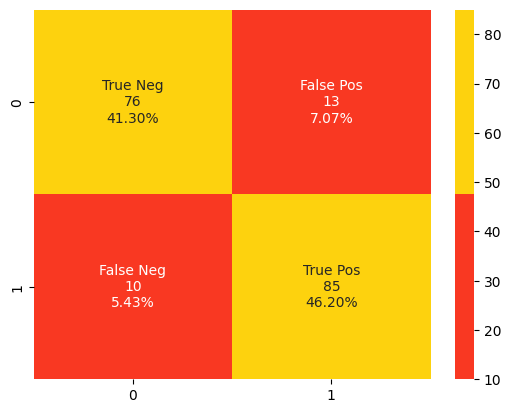

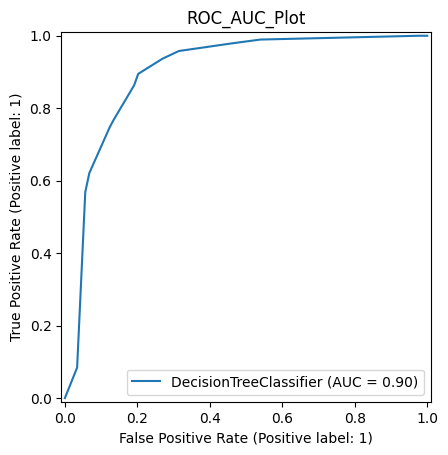

In [243]:
model(classifier_dt) 

In [244]:
model_evaluation(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Random Forest Classifier

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


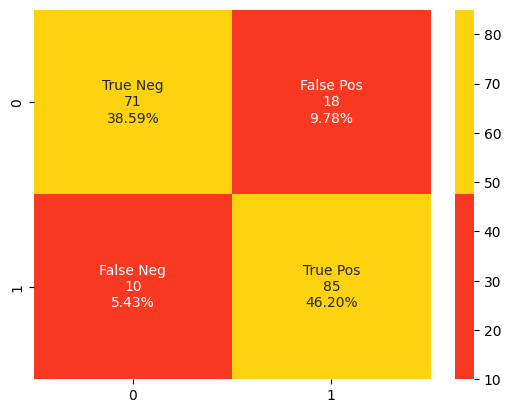

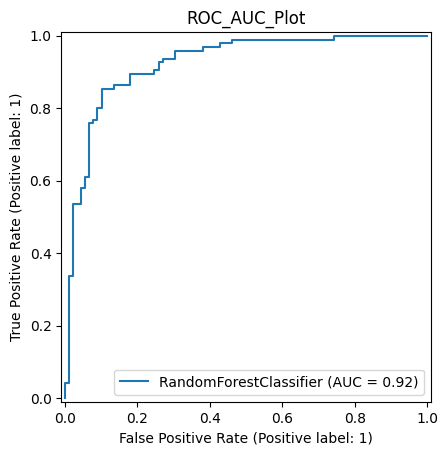

In [247]:
model(classifier_rf)

In [248]:
model_evaluation(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



### K-nearest Neighbors Classifier

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


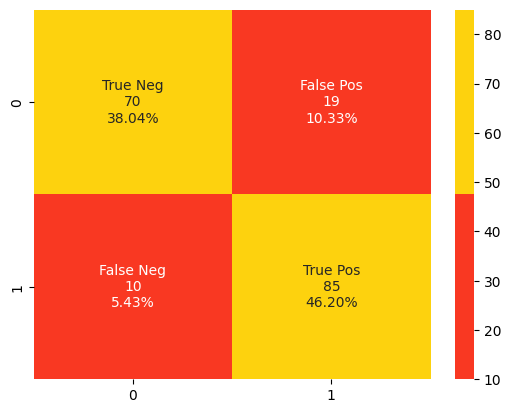

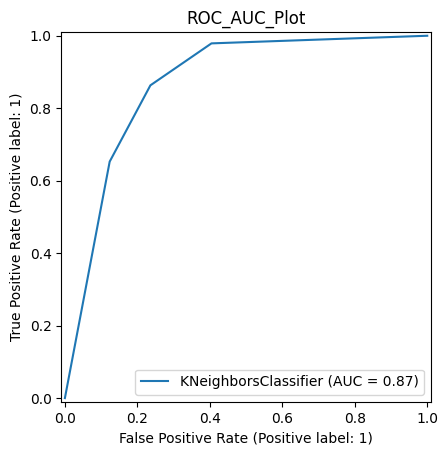

In [251]:
model(classifier_knn)

In [252]:
model_evaluation(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



### XGBoost

In [253]:
from xgboost import XGBClassifier

In [254]:
classifier_xgb = XGBClassifier(
    random_state=0,
    n_estimators=50,
    max_depth=3,
    learning_rate=0.105,
    subsample=0.8,
    colsample_bytree=0.9,
    eval_metric='logloss'
)

Accuracy :  86.41%
Cross Validation Score :  93.23%
ROC_AUC Score :  86.24%


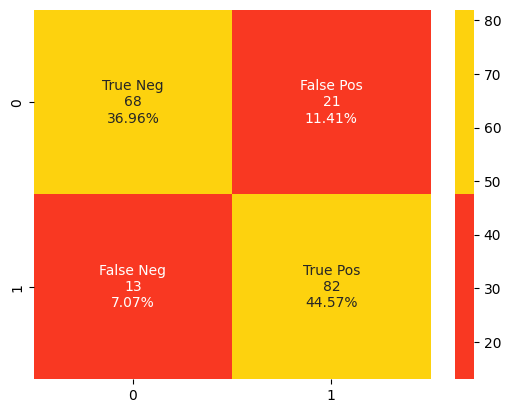

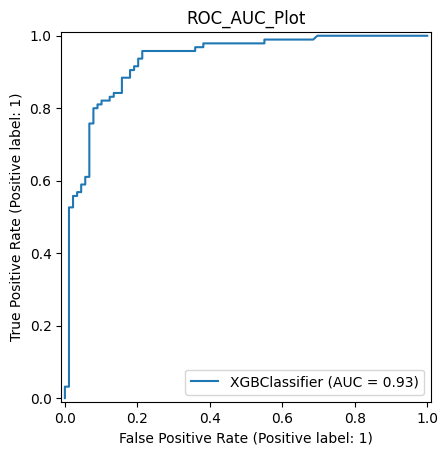

In [255]:
model(classifier_xgb)

In [256]:
model_evaluation(classifier_xgb)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        89
           1       0.84      0.92      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



## Conclusion

In [257]:
tab_data = {
    "Sr.No.": [1, 2, 3, 4, 5, 6], 
    "ML Algorithm": ["Logistic Regression", "Support Vector Classifier", 
                     "Decision Tree Classifier", "Random Forest Classifier", 
                     "K-Nearest Neighbors Classifier", "XGBoost"],
    "Accuracy": ["87.50%", "87.50%", "84.78%", "84.24%", "81.52%", "86.41%"],
    "Cross Validation Score": ["91.11%", "90.53%", "89.09%", "92.91%", "89.34%", "93.23%"],
    "ROC AUC Score": ["87.43%", "87.43%", "84.62%", "84.06%", "81.36%", "86.24%"]
}

pd.set_option('display.max_columns', 50) 
pd.set_option('display.width', 1000)
df = pd.DataFrame(tab_data)

formatters = {
    'Sr.No.':                   lambda x: f"{x:<10}",
    'ML Algorithm':             lambda x: f"{x:<35}",
    'Accuracy':                 lambda x: f"{x:<15}",
    'Cross Validation Score':   lambda x: f"{x:<25}",
    'ROC AUC Score':            lambda x: f"{x:<15}"
}

print(df.to_string(index=False, formatters=formatters, justify="left"))

Sr.No.     ML Algorithm                        Accuracy        Cross Validation Score    ROC AUC Score  
1          Logistic Regression                 87.50%          91.11%                    87.43%         
2          Support Vector Classifier           87.50%          90.53%                    87.43%         
3          Decision Tree Classifier            84.78%          89.09%                    84.62%         
4          Random Forest Classifier            84.24%          92.91%                    84.06%         
5          K-Nearest Neighbors Classifier      81.52%          89.34%                    81.36%         
6          XGBoost                             86.41%          93.23%                    86.24%         


## XAI

Giải thích cho bệnh nhân thứ 0:


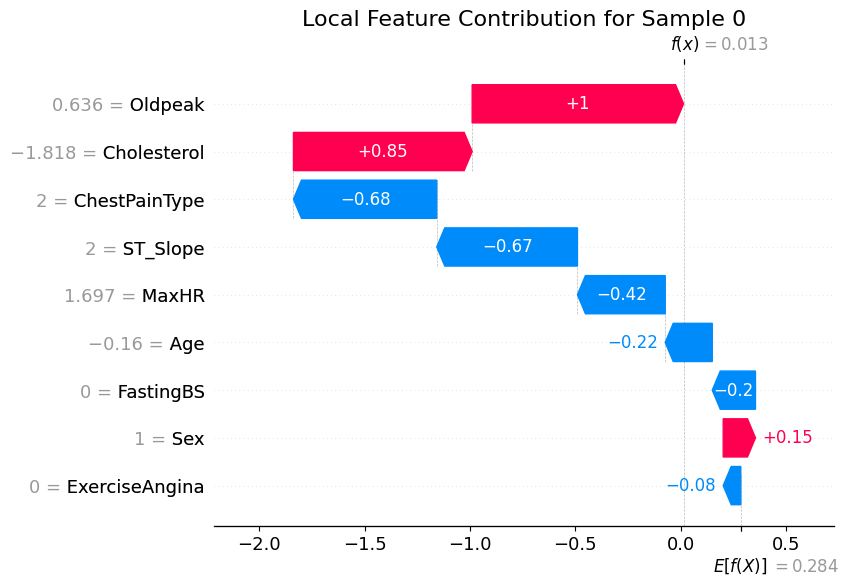

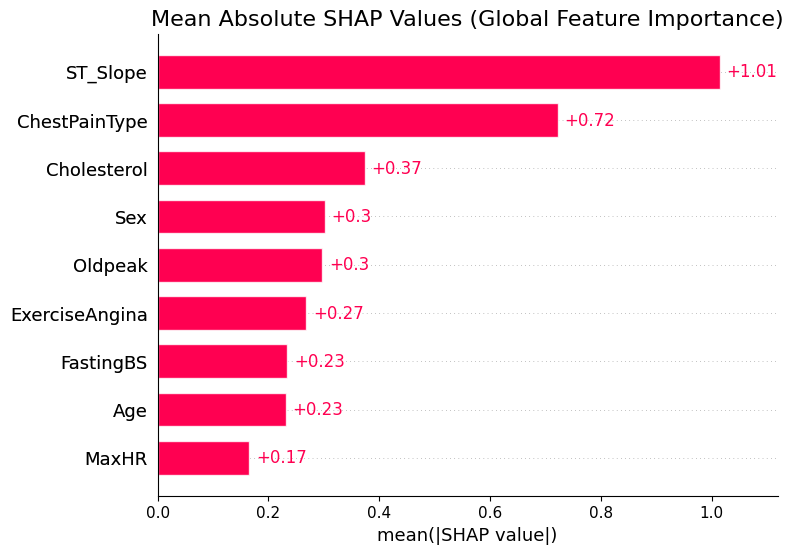

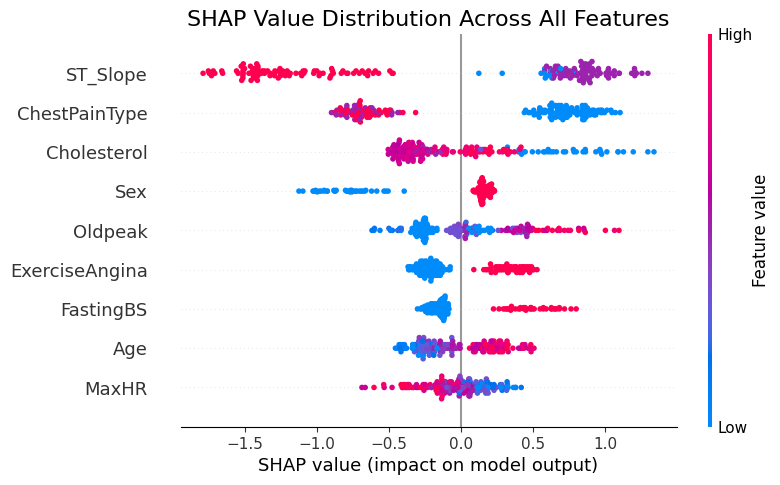

In [ ]:
import shap

i = 0
shap_explainer = shap.Explainer(classifier_xgb, x_train)
shap_values = shap_explainer(x_test)

# Plot SHAP
print(f"Giải thích cho bệnh nhân thứ {i}:")
shap.plots.waterfall(shap_values[i], show=False)
plt.title(f"Individual Prediction Explanation", fontsize=16)  
plt.show()

shap.plots.bar(shap_values, show=False)
plt.title("Local Feature Importance Ranking", fontsize=16)
plt.show()

shap.plots.beeswarm(shap_values, show=False)
plt.title("Global Feature Impact Distribution", fontsize=16)
plt.show()

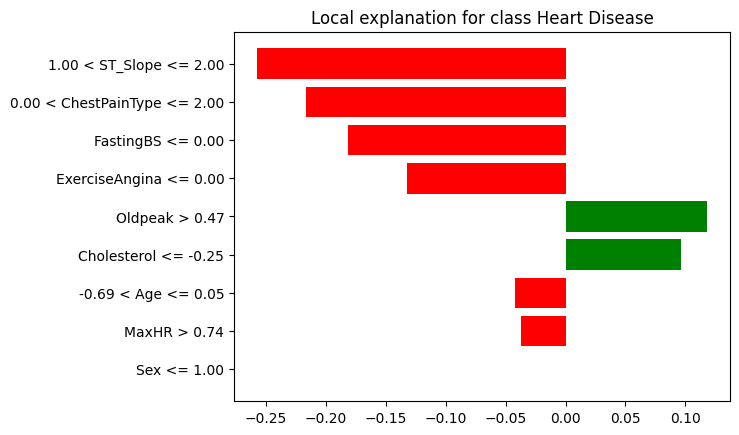

In [259]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x_train.columns,
    class_names=['Normal', 'Heart Disease'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=x_test.iloc[i].values,
    predict_fn=classifier_xgb.predict_proba
)

fig = exp.as_pyplot_figure()
plt.show()

In [260]:
background_summary = shap.kmeans(x_train, 50)
lime_training_data = x_train.values

## Export model

In [261]:
import joblib

In [262]:
# joblib.dump(
#     {
#         "model": classifier_xgb,
#         "label_encoders": {
#             "Sex": le_sex,
#             "ChestPainType": le_chest,
#             "RestingECG": le_ecg,
#             "ExerciseAngina": le_angina,
#             "ST_Slope": le_slope
#         },
#         "scalers": {
#             "MinMax_Oldpeak": mms,
#             "Standard_Numeric": ss
#         },
#         "features": features.columns,
#         "target": "HeartDisease",
#         "shap_background": background_summary,
#         "lime_training_data": lime_training_data
#     },
#     "../src/models/model_predict.pkl"
# )